In [4]:
import tensorflow as tf
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2
import imghdr

In [17]:
data_dir = 'data'

In [12]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image data\Eye_diseases\Bulging_Eyes
Issue with image data\Eye_diseases\Cataracts
Issue with image data\Eye_diseases\Crossed_Eyes
Issue with image data\Eye_diseases\Eye_diseases
Issue with image data\Eye_diseases\Glaucoma
Issue with image data\Eye_diseases\Uveitis


In [19]:
tf.data.Dataset

import numpy as np
from matplotlib import pyplot as plt



In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 383 files belonging to 5 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [25]:
# images Represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [26]:
# Class 1 = Sad 
# Class 0 = happy
batch[1]

array([2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 4, 4, 1,
       2, 3, 4, 2, 3, 2, 1, 4, 4, 2])

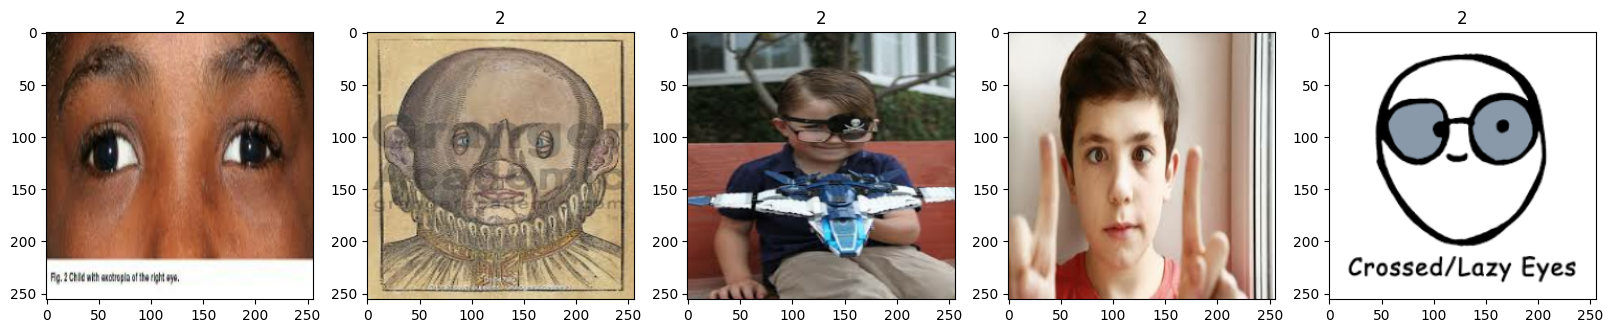

In [28]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [29]:
scaled = batch[0] / 255

In [30]:
data = data.map(lambda x, y: (x / 255, y))

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [32]:
batch = scaled_iterator.next()

In [33]:
batch[0].max()

1.0

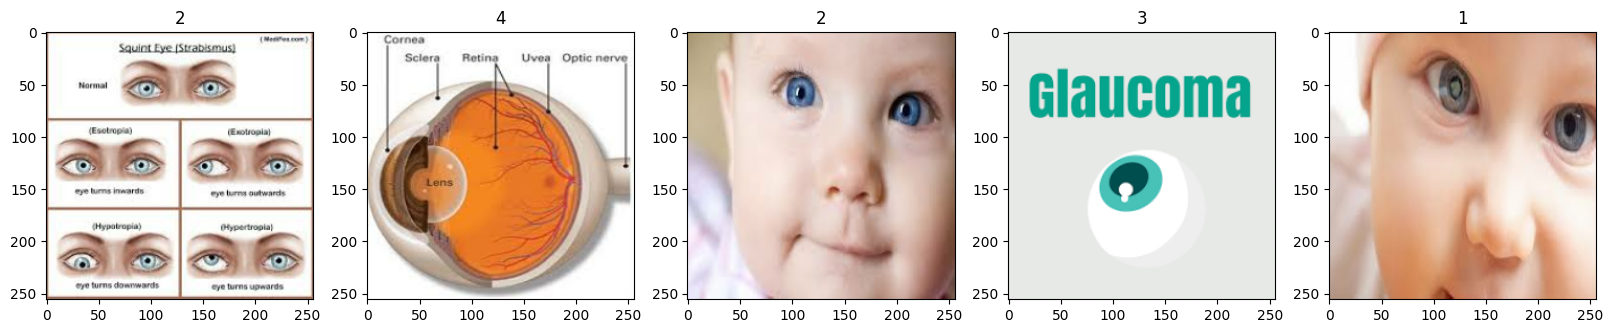

In [34]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [35]:
len(data)

12

In [39]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 1

train_size + val_size + test_size

12

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()


model.add(Conv2D(32, (3,3), 1, activation = 'sigmoid', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'sigmoid'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'sigmoid'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])

model.summary()

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

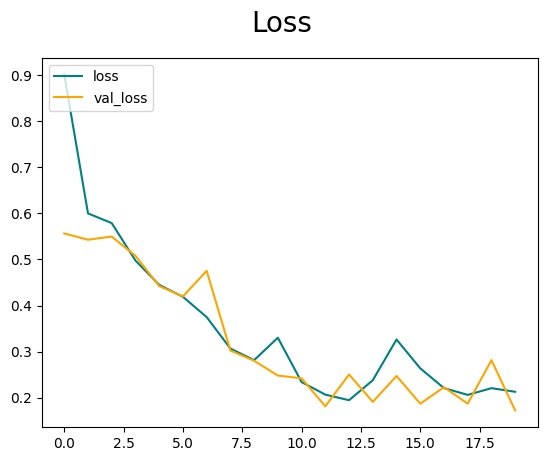

In [164]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

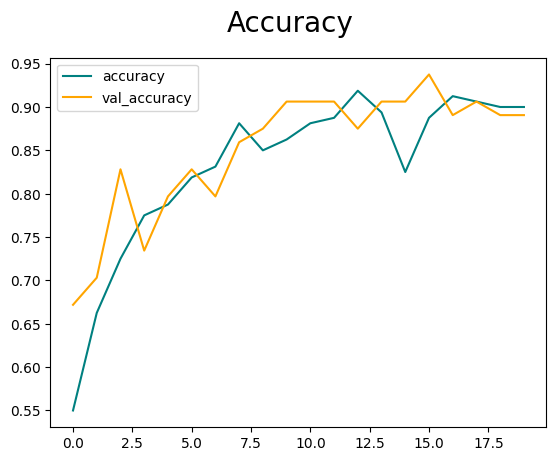

In [165]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [168]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

1/1 [==============================] - 0s 86ms/step
Precision:1.0, Recall: 1.0, Accuracy: 1.0


In [ ]:
#You can test the NN here by passing in an image
img = cv2.imread(#image name)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR@RGB))
plt.show()

In [ ]:
#Have to resize the image before we pass it into the NN
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize / 255, 0))
yhat

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')